In [26]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

In [27]:
imageName = 'Lenna.jpg'

In [20]:
image = cv2.imread(imageName)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

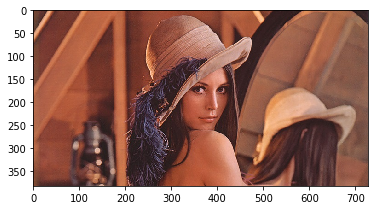

In [22]:
plt.imshow(image_RGB)

In [28]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
# construct a sharpening filter
sharpen = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), dtype="int")
laplacian = np.array(([0, 1, 0], [1, -4, 1], [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]), dtype="int")
edge = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]), dtype = "int")

In [30]:
kernelBank = (("small_blur", smallBlur), ("large_blur", largeBlur),
              ("sharpen", sharpen), ("laplacian", laplacian),
              ("sobel_x", sobelX), ("sobel_y", sobelY), ('edge', edge))

[INFO] applying small_blur kernel


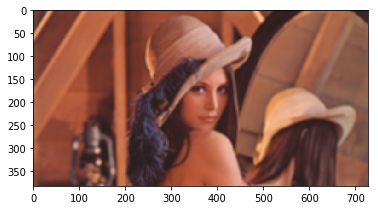

[INFO] applying large_blur kernel


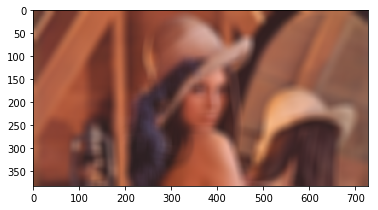

[INFO] applying sharpen kernel


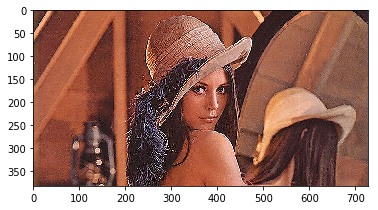

[INFO] applying laplacian kernel


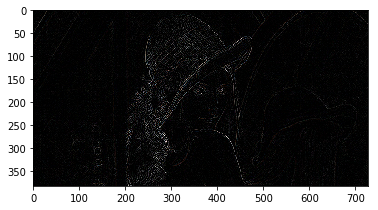

[INFO] applying sobel_x kernel


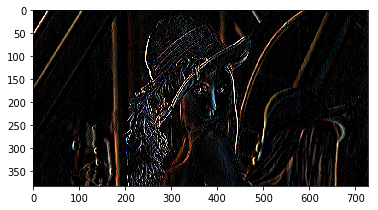

[INFO] applying sobel_y kernel


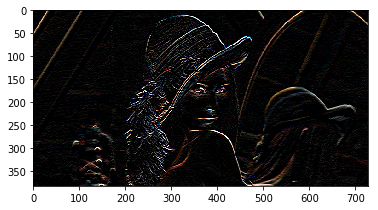

[INFO] applying edge kernel


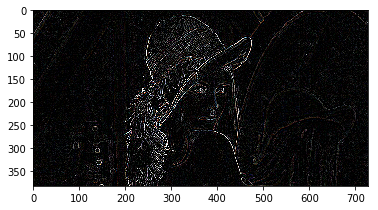

In [34]:
for (kernelName, kernel) in kernelBank:
    print("[INFO] applying {} kernel".format(kernelName))
    convoleOutput = cv2.filter2D(image_RGB, -1, kernel)
    plt.imshow(convoleOutput)
    plt.show()